In [5]:
# Load the titanic Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Load the dataset
df = pd.read_csv('titanic.csv')

In [15]:
# 2. Inspect the Data 

# display the first few rows of the dataset
print(df.head()) # will display 5 indec by default

# Check the data types and number of non-null values
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [19]:
# Get summary statistics for numerical columns
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.315152    0.524184   
std     256.998173    0.486260    0.834700   12.984932    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.000000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [20]:
# 3. Handle Missing Values
# Check for missing values in each column
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [22]:
# Fill missing 'Age' values with the median (without using inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())

In [23]:
# Drop rows with missing 'Embarked' values
df.dropna(subset=['Embarked'], inplace=True)

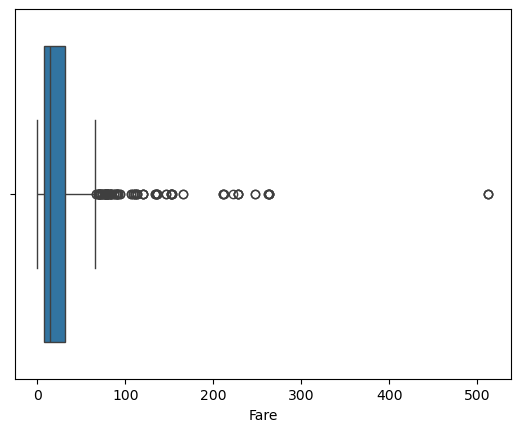

In [24]:
# 4. Detect and Handle Outliers
# Create a box plot for 'Fare' to detect outliers
sns.boxplot(x=df['Fare'])
plt.show()

In [25]:
# Remove outliers in 'Fare' using the IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= (Q1 - 1.5 * IQR)) & (df['Fare'] <= (Q3 + 1.5 * IQR))] # formula

In [26]:
# 5. Feature Engineering
# Create a new feature 'FamilySize' from 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [27]:
# 6. Convert Categorical Variables
# One-hot encode the 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [28]:
# Label encode the 'Sex' column (male = 0, female = 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [29]:
# 7. Sample the Data
# Sample 10% of the data
sampled_df = df.sample(frac=0.1, random_state=42)

In [32]:
# Display the cleaned dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0  22.0      1      0   
2                        Heikkinen, Miss. Laina    1  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                      Allen, Mr. William Henry    0  35.0      0      0   
5                              Moran, Mr. James    0  28.0      0      0   

             Ticket     Fare Cabin  FamilySize  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN           2       False        True  
2  STON/O2. 3101282   7.9250   NaN           1       False        True  
3            113803  53.1000  C123           2       False        True  
4            373450   8.0500   NaN